# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


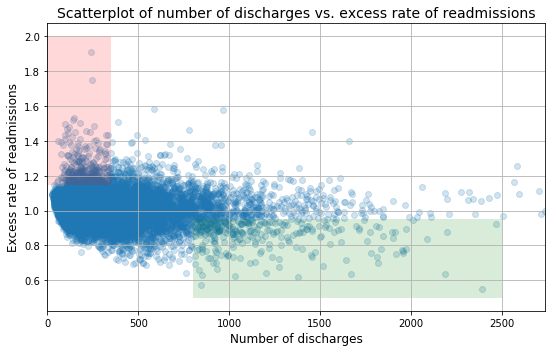

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

## Do you agree with the above analysis and recommendations? Why or why not?
Whilst the analysis above provides a starting point to look at the issues, further analysis is still required before any conclusions are drawn. Firstly, the analysis provides summary statistics on populations with arbitary segmentation (e.g. hospitals/facilities with number of discharges < 100) without analyzing if the differences in the population are statistically significant. 

Using the preliminary analysis then plots the number of discharges vs. excess rate of readmissions to draw a conclusion that there is a significant corrolation. Using the corrolation, the preliminary analysis uses it to conclude a causation which it then uses to propose a recommendation that is not supported by the study (e.g. no prior mention that facilities < 300 constitute a small capacity, no root cause analysis done on the concluded issues). Furthermore, the recommendation of consolidation fails to account for practical factors (e.g. if consolidation would still afford citizens basic health care within an acceptable response time) and lacks a simple financial study to verify the cost implications of such a measure. 
Whilst the study's conclusions and recommendations may be true, this is not currently supported by the information presented. Further studies are required to reach such conclusions. 

## Set up an appropriate hypothesis test

Null hypothesis: There is no difference in the excess readmission rate for hospitals/facilities with number of discharges <= 300 (6213 observations) and those > 300(5365 observations). 
Note that 300 was chosen as it was used in the final recommendation as a definition of small capacity. 

Test statistic: Mean excess readmission rate (note the level of readmission rate greater than 1 is a measure of the distrubtion's skew).

## Compute and report the observed significance value (or p-value).

### Define reusable functions 

In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

### Calculate p value 
Using a 2 sample permutation test

In [43]:
# Define two samples
clean_data = clean_hospital_read_df[81:-3]
low_discharges = clean_data[clean_data['Number of Discharges'] <= 300]['Excess Readmission Ratio']
high_discharges = clean_data[clean_data['Number of Discharges'] > 300]['Excess Readmission Ratio']

# Compute difference of excess readmission rate from two samples: empirical_diff_means
empirical_diff_means = diff_of_means(low_discharges, high_discharges)
print('empirical mean of low discharges =', np.mean(low_discharges))
print('empirical mean of high discharges =', np.mean(high_discharges))
print('empirical difference in means =', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(low_discharges, high_discharges,
                               diff_of_means, size=10000)

# # Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# # Print the result
print('p-value =', p)

empirical mean of low discharges = 1.01426055121
empirical mean of high discharges = 0.999856322268
empirical difference in means = 0.014404228939
p-value = 0.0


The p-value was extremely low, we must therefore reject the null hypothesis that there is no difference in the excess readmission rate for hospitals/facilities with number of discharges <= 300 and those > 300.

### Report statistical significance for  α  = .01
Using a 1 tail significance test

In [42]:
mu = np.mean(perm_replicates)
sigma = np.std(perm_replicates)

# α  = .01 for a one tail test has a z value of 2.33, the corresponding value is: 
extreme_excess_ratio = 2.33*sigma + mu
print('There is a 1% probability that a normally distributed difference of means of excess readmission ratio would exceed: '+ str(extreme_excess_ratio) )

There is a 1% probability that a normally distributed difference of means of excess readmission ratio would exceed: 0.00404195417585


## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The finding here is that there is a statistically significant lower Excess Readmission Ratio in hospitals/facilities with a higher number of discharges. 
The practical significance of this finding is obscured by the baseline used - the 'expected readmission rate'. The expected readmission rate is derived from an average hospital with similar patients. 
Practically speaking, the baseline should be a theoretical limit informed by a study. Alternatively they could have use real data around 'useful' readmissions (e.g. active interventions or if the course of treatment was significantly altered) to determine if the level of excess readmissions was acceptable. 

My recommendation would be to study the cause of the lower readmission before taking action. For example, the readmission in larger facilities could be lower because there are better and more experienced doctors in those facilities. The recommendation for such a finding would be to review and improve the quality of training in smaller facilities. 

## What are the advantages and disadvantages of using the scatter plot above to convey information?
The scatter plot above has the advantage of providing the reader a sense of distribution (spread and density) of the data along both axes. The information provided to the reader is very rich, for example, we clearly see that for facilities under 500 discharges, the data is concentrated around 0.8 - 1.2. The lack of data with very small discharges (under 50) with excess readmission rate below 1.1 makes me suspicious of the baseline. This level of information isn't always available with simpler plots. 
On the flip side, the excess of information could detract from the main message the author is tryign to convey, for example, that the mean is higher for small facilities. 

## Construct another plot that conveys the same information in a more direct manner.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


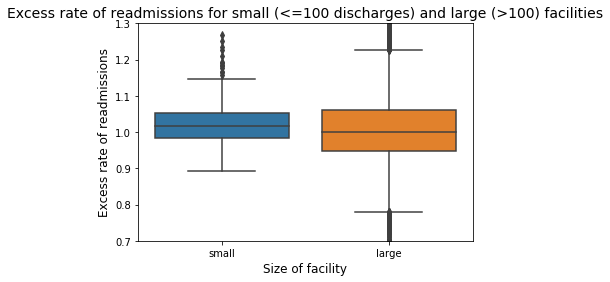

In [52]:
import seaborn as sns

clean_data['size'] = ['small' if discharges <= 100 else 'large' for discharges in clean_data['Number of Discharges'] ]
_ = sns.boxplot(x="size", y="Excess Readmission Ratio", data=clean_data)

_.set_ylim([0.7, 1.3])
_.set_xlabel('Size of facility', fontsize=12)
_.set_ylabel('Excess rate of readmissions', fontsize=12)
_.set_title('Excess rate of readmissions for small (<=100 discharges) and large (>100) facilities', fontsize=14)

plt.show()

In [ ]:
r